In [1]:
from pydub.exceptions import CouldntDecodeError
import os
from pydub import AudioSegment
import pandas as pd

import csv

import json

In [2]:
rootdir = '../EMBRACE-data-analysis/data/summer23-pitt'

df_duration_audios = []#pd.DataFrame()

current_family = ""
total_time_duration = 0
total_chapter_openings = 0
for subdir, dirs, files in os.walk(rootdir):

    if "Family_" in subdir:
        print(subdir)
        if current_family=="" or current_family not in subdir:
            if(current_family!=""):
                df_duration_audios.append({"CCID":current_family,"duration":total_time_duration,"chapter_openings":total_chapter_openings})
                print(current_family+" total time: "+str(total_time_duration)+" chapter openings: "+str(total_chapter_openings))
            index_family = subdir.find("Family_")
            current_family = subdir[index_family:index_family+10]
            print("New family: "+current_family)
            total_time_duration = 0
            total_chapter_openings = 0
    for file in files:
        file_path = os.path.join(subdir, file)

        if file_path.endswith(".mp3"):
            file_stats = os.stat(file_path)
            file_size = file_stats.st_size
            if(file_size>2000):
                #print(file_path)
                #print(f'File Size in Bytes is {file_size}')
                try:
                    try:
                        audio = AudioSegment.from_file(file_path, "mp3")
                    except:
                        audio = AudioSegment.from_file(file_path, format="mp4")

                    total_time_duration = total_time_duration + audio.duration_seconds
                    total_chapter_openings = total_chapter_openings + 1
                    #print(subdir+" -> total time duration: "+str(total_time_duration)+" seconds")
                except CouldntDecodeError:
                    print("Error on reading the file: "+file_path)

#    if(total_time_duration>0):
#        df_duration_audios.append(total_time_duration)

#Last family's data
df_duration_audios.append({"CCID":current_family,"duration":total_time_duration,"chapter_openings":total_chapter_openings})
print(current_family+" total time: "+str(total_time_duration)+" chapter openings: "+str(total_chapter_openings))

header = ["CCID","duration","chapter_openings"]
with open('summary-pittsummer23-audios.csv', 'w') as file:
    writer = csv.DictWriter(file, fieldnames=header)
    writer.writeheader()
    for row in df_duration_audios:
        writer.writerow(row)
#show stats about total duration of the audios per family
# sum_durations = 0
# total_families = 0
# for i in range(0,len(df_duration_audios)):
#     print(df_duration_audios[i])
#     total_families = total_families + 1
#     sum_durations = sum_durations + df_duration_audios[i]
# print("average of total duration is: ")
#print(sum_durations/total_families)

#print(df_duration_audios.describe())



../EMBRACE-data-analysis/data/summer23-pitt/Family_34
New family: Family_34
../EMBRACE-data-analysis/data/summer23-pitt/Family_34/34_Chromebook Data
../EMBRACE-data-analysis/data/summer23-pitt/Family_34/34_Chromebook Data/34_voice-recordings
../EMBRACE-data-analysis/data/summer23-pitt/Family_34/34_Chromebook Data/34_data_json
../EMBRACE-data-analysis/data/summer23-pitt/Family_34/34_Chromebook Data/34_data
../EMBRACE-data-analysis/data/summer23-pitt/Family_34/34_Chromebook Data/34_data/journal
../EMBRACE-data-analysis/data/summer23-pitt/Family_34/34_Chromebook Data/34_data/diagnostic.data
../EMBRACE-data-analysis/data/summer23-pitt/Family_33
Family_34 total time: 373.512 chapter openings: 3
New family: Family_33
../EMBRACE-data-analysis/data/summer23-pitt/Family_33/33_Chromebook Data
../EMBRACE-data-analysis/data/summer23-pitt/Family_33/33_Chromebook Data/33_data
../EMBRACE-data-analysis/data/summer23-pitt/Family_33/33_Chromebook Data/33_data/journal
../EMBRACE-data-analysis/data/summer

In [47]:
#load prompts metadata csv

path_prompts_metadata = '../EMBRACE-data-analysis/data/summer23-pitt/Cuentame Cuentos Story Questions.csv'

# Load the CSV file into a DataFrame
df_prompts_metadata = pd.read_csv(path_prompts_metadata)

#Checks if prompt is ER (Elaborative reminiscence)
df_prompts_metadata['is_ER'] = df_prompts_metadata['Prompt Category'].str.contains('ER')

#Checks if prompt is a question
df_prompts_metadata['is_Question'] = df_prompts_metadata['Prompt Category'].str.contains('Q')

#Checks if prompt is a statement
df_prompts_metadata['is_Statement'] = df_prompts_metadata['Prompt Category'].str.contains('S')

# Display the first few rows of the DataFrame
print(df_prompts_metadata[20:30])

        Book Name      Chapter Name  Page Prompt Category  Reading Instance  \
20  The Best Farm  2. Getting Ready     1          ER1(=)                 1   
21  The Best Farm  2. Getting Ready     1              S2                 2   
22  The Best Farm  2. Getting Ready     1              Q2                 2   
23  The Best Farm  2. Getting Ready     1          ER2(-)                 2   
24  The Best Farm  2. Getting Ready     1              S3                 3   
25  The Best Farm  2. Getting Ready     1              Q3                 3   
26  The Best Farm  2. Getting Ready     1          ER3(+)                 3   
27  The Best Farm  2. Getting Ready     2              S1                 1   
28  The Best Farm  2. Getting Ready     2              Q1                 1   
29  The Best Farm  2. Getting Ready     2          ER1(=)                 1   

                                    Prompt Name (ENG)  \
20  Prompt your child: Tell me about a time when y...   
21  Tell your ch

In [48]:
rootdir = '../EMBRACE-data-analysis/data/summer23-pitt'

list_act_logs_clickPrompts = []#pd.DataFrame()

list_act_logs_sentences = []

current_family = ""

for subdir, dirs, files in os.walk(rootdir):

    if "Family_" in subdir:
        print(subdir)
        if current_family=="" or current_family not in subdir:
            #if(current_family!=""):
                #df_act_logs.append({"CCID":current_family,"data":0})
            index_family = subdir.find("Family_")
            current_family = subdir[index_family:index_family+10]
            print("New family: "+current_family)

    for file in files:
        file_path = os.path.join(subdir, file)

        if file_path.endswith("systemactions.json"):
            print("Found the json!")

            # Opening JSON file
            f = open(file_path)

            # returns JSON object as
            # a dictionary
            data = json.load(f)

            # Iterating through the json
            # list
            for row in data:
                if row['actionName']=='clickPrompt':
                    #print(row)
                    #print(type(row))
                    row['CCID']=current_family
                    list_act_logs_clickPrompts.append(row)
                    print(row)
                if (row['actionName']=='loadSentence' or row['actionName']=='reachEndOfCurrentChapter' or row['actionName']=='clickPrompt'):
                    currUser=current_family
                    #print(row)
                    #currBookLanguage =  row['bookLanguage']
                    if('bookId' in row):
                        currBookId = row['bookId']
                    else:
                        currBookId = '-'
                    if('chapterId' in row):
                        currChapterId = row['chapterId']
                    else:
                        currChapterId = '-'
                    if('currPageID' in row):
                        currPageId = row['currPageID']
                    else:
                        currPageId = '-'
                    if('currentSentenceID' in row):
                        currSentenceId = row['currentSentenceID']
                    else:
                        currSentenceId = '-'
                    if('actionDescription' in row):
                        currDescription = row['actionDescription']
                    else:
                        currDescription = '-'
                    currActionName=row['actionName']
                    currDatetime = row['dateTime']
                    sentence_info = {'user':currUser,'actionName':currActionName,'book':currBookId,'chapter':currChapterId,'page':currPageId,'sentence':currSentenceId,'description':currDescription,'datetime':currDatetime['$date']}#,'lang':currBookLanguage}
                    list_act_logs_sentences.append(sentence_info)

            # Closing file
            f.close()

print("Finished processing")

# Each element is a dict
d_series_prompts = pd.Series(list_act_logs_clickPrompts)
df_act_logs_prompts = pd.DataFrame.from_records(d_series_prompts)

d_series_sentences = pd.Series(list_act_logs_sentences)
df_act_logs_sentences = pd.DataFrame.from_records(d_series_sentences)

print(type(df_act_logs_prompts.loc[[20]]))
print(type(df_act_logs_sentences.loc[[10]]))


../EMBRACE-data-analysis/data/summer23-pitt/Family_34
New family: Family_34
../EMBRACE-data-analysis/data/summer23-pitt/Family_34/34_Chromebook Data
../EMBRACE-data-analysis/data/summer23-pitt/Family_34/34_Chromebook Data/34_voice-recordings
../EMBRACE-data-analysis/data/summer23-pitt/Family_34/34_Chromebook Data/34_data_json
Found the json!
{'_id': {'$oid': '6477ca939544917a15c18f01'}, 'user': 'cc107', 'dateTime': {'$date': '2023-05-31T22:30:43.093Z'}, 'actionName': 'clickPrompt', 'actionDescription': 'Tell your child:,The names of some animals that are on the farm->off', 'isAsync': True, 'actionDuration': 0, 'bookLanguage': 'English (EN)', 'bookId': 'The Best Farm (pre-schoolers)', 'chapterId': 'The Contest', 'currPageID': 1, 'currentSentenceID': 2, '__v': 0, 'CCID': 'Family_34'}
{'_id': {'$oid': '6477ca9b9544917a15c18f03'}, 'user': 'cc107', 'dateTime': {'$date': '2023-05-31T22:30:51.301Z'}, 'actionName': 'clickPrompt', 'actionDescription': 'Tell your child:,The names of some animals

In [48]:
#Aggregation of the data

# Using groupby() and count()
# to get the count of each group
#df_off filter
df_prompts_off= df_act_logs_prompts[df_act_logs_prompts['actionDescription'].str.endswith('->off')]
#Unique clicks
#df_prompts = df_prompts_off.groupby(['CCID'])['actionDescription'].nunique().reset_index(name="clickPrompts")

#Total number of clicks (repeated)
df_prompts = df_prompts_off.groupby(['CCID'])['actionDescription'].count().reset_index(name="clickPrompts")

print("Get count of each family:\n", df_prompts)

header = ["CCID","clickPrompts"]
with open('summary-pittsummer23-prompts.csv', 'w') as file:
    writer = csv.DictWriter(file, fieldnames=header)
    writer.writeheader()
    dict_prompts = df_prompts.to_dict(orient='records')
    for row in dict_prompts:
        writer.writerow(row)


Get count of each family:
          CCID  clickPrompts
0   Family_01           138
1   Family_02             5
2   Family_03            46
3   Family_04            84
4   Family_05             2
5   Family_06            75
6   Family_07            72
7   Family_08           242
8   Family_09            75
9   Family_10            94
10  Family_11           106
11  Family_12           214
12  Family_13           229
13  Family_14           217
14  Family_15           143
15  Family_17            29
16  Family_18           109
17  Family_19           101
18  Family_20            80
19  Family_21            91
20  Family_22            37
21  Family_23           241
22  Family_24           316
23  Family_25           102
24  Family_26            79
25  Family_27           224
26  Family_28           175
27  Family_29           266
28  Family_31           207
29  Family_32            96
30  Family_33            47
31  Family_34             5
32  Family_35            22
33  Family_36        

In [28]:
# Create a new column for session ID
df_act_logs_sentences['session_id'] = 'xxx'

# #min threshold for considering a new session (in minutes)
min_threshold = 10
#
# #current user
curr_user = ''
sid = 1
#
# # Iterate through the rows and assign session IDs based on 30-minute difference
for i in range(1, len(df_act_logs_sentences)):
    #print(df_act_logs_sentences.at[i,'user'])
    if(curr_user==''):
         curr_user=df_act_logs_sentences.at[i,'user']
    else:
         if(curr_user!=df_act_logs_sentences.at[i,'user']):
             curr_user=df_act_logs_sentences.at[i,'user']
             sid=1
         else:
            #print(pd.to_datetime(df_act_logs_sentences.at[i, 'datetime']) - pd.to_datetime(df_act_logs_sentences.at[i - 1, 'datetime']))
            if (pd.to_datetime(df_act_logs_sentences.at[i, 'datetime']) - pd.to_datetime(df_act_logs_sentences.at[i - 1, 'datetime'])) > pd.Timedelta(minutes=min_threshold):
                sid = sid + 1

    df_act_logs_sentences.loc[i,'session_id'] = curr_user+'-'+str(sid)
#
# print test
print(df_act_logs_sentences.loc[[20]])


         user    actionName                           book      chapter page  \
20  Family_33  loadSentence  The Best Farm (pre-schoolers)  The Contest    1   

   sentence description                  datetime   session_id  
20        2           -  2023-05-06T19:47:19.341Z  Family_33-2  


In [29]:
#count how many sessions did they have
from dateutil import parser
from datetime import datetime

date_str = "2023-06-09T01:48:02Z"
format_str = "%Y-%m-%dT%H:%M:%S%z"

# Replace Z with +0000 to match the %z format
date_str = date_str.replace("Z", "+0000")
parsed_date = datetime.strptime(date_str, format_str)

n_sessions = df_act_logs_sentences.groupby('user')['session_id'].nunique()
print(n_sessions)

# session duration
agg_sessions = df_act_logs_sentences.groupby(['user','session_id'])['datetime'].agg(['first', 'last']).reset_index()

agg_sessions = agg_sessions.dropna()

agg_sessions['duration'] = pd.to_datetime(agg_sessions['last'],format='ISO8601')-pd.to_datetime(agg_sessions['first'],format='ISO8601')

print(agg_sessions[500:550])

user
Family_01    30
Family_02     6
Family_03    26
Family_04    19
Family_05    24
Family_06     7
Family_07    14
Family_08    19
Family_09    12
Family_10    15
Family_11     9
Family_12    21
Family_13    37
Family_14     9
Family_15    11
Family_16     1
Family_17    16
Family_18    18
Family_19    10
Family_20    13
Family_21    11
Family_22     7
Family_23    23
Family_24     7
Family_25    14
Family_26    13
Family_27    15
Family_28    11
Family_29    15
Family_31     7
Family_32     5
Family_33     5
Family_34     2
Family_35     4
Family_36     9
Family_38    15
Family_40    13
Family_41     8
Family_42     9
Family_44     7
Family_45     8
Name: session_id, dtype: int64
          user   session_id                     first  \
500  Family_41  Family_41-8  2023-07-05T12:21:44.036Z   
501  Family_42  Family_42-1  2023-05-30T22:56:59.770Z   
502  Family_42  Family_42-2  2023-06-02T21:07:42.620Z   
503  Family_42  Family_42-3  2023-06-05T22:02:35.819Z   
504  Family_42  Family_

In [73]:
#sentence loaded analysis
n_books = df_act_logs_sentences.groupby('user')['book'].nunique()
print(n_books)

n_sentences = df_act_logs_sentences.groupby(['user','book','chapter','page','sentence'])['sentence'].count()
print(n_sentences)


user
Family_01    3
Family_02    3
Family_03    3
Family_04    3
Family_05    3
Family_06    3
Family_07    3
Family_08    3
Family_09    3
Family_10    3
Family_11    3
Family_12    3
Family_13    3
Family_14    3
Family_15    3
Family_16    1
Family_17    3
Family_18    3
Family_19    3
Family_20    3
Family_21    3
Family_22    2
Family_23    4
Family_24    3
Family_25    3
Family_26    2
Family_27    3
Family_28    3
Family_29    3
Family_31    3
Family_32    2
Family_33    3
Family_34    1
Family_35    2
Family_36    3
Family_38    3
Family_40    3
Family_41    2
Family_42    3
Family_44    3
Family_45    2
Name: book, dtype: int64
user       book                                       chapter                  page  sentence
Family_01  A Celebration to Remember (pre-schoolers)  A Friend in Need         1     1           5
                                                                                     2           5
                                                               

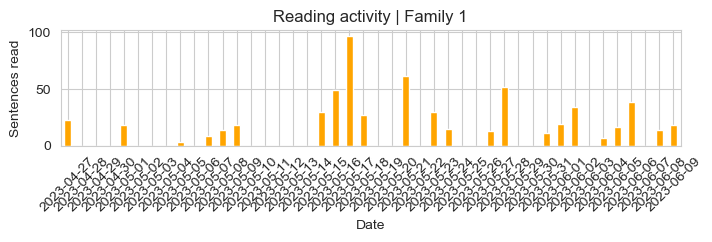

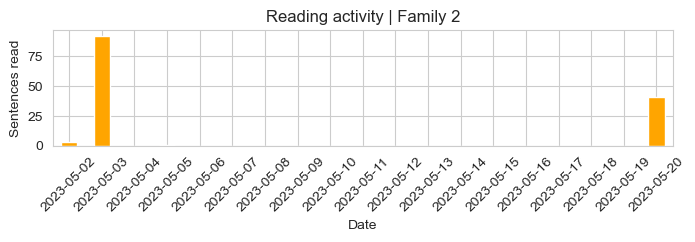

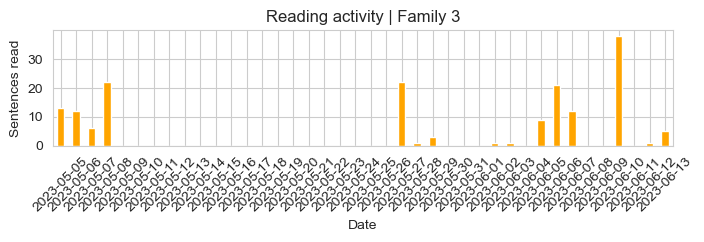

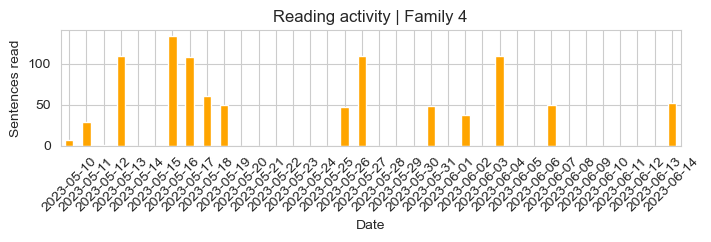

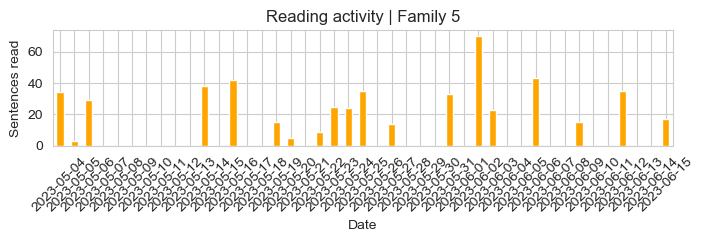

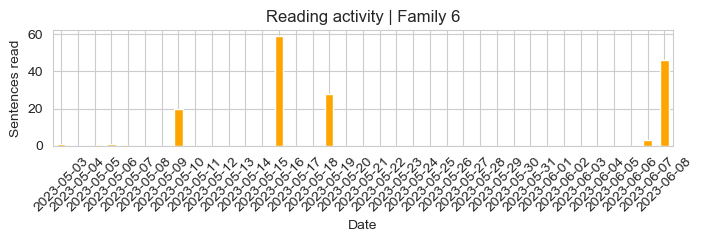

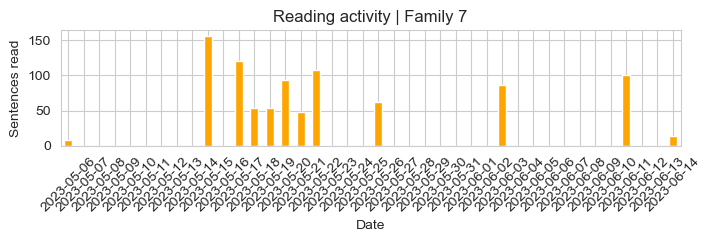

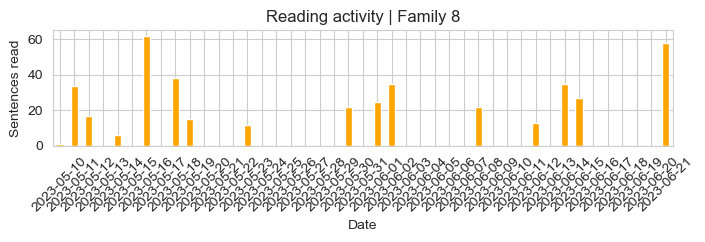

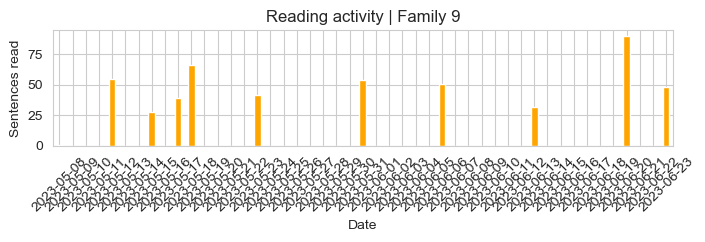

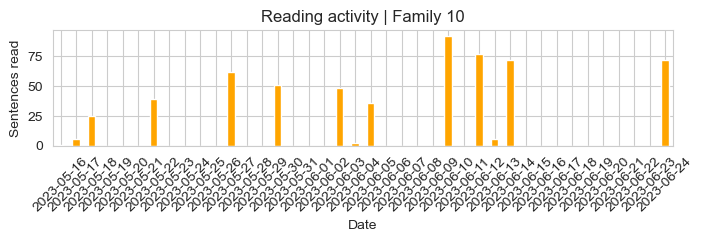

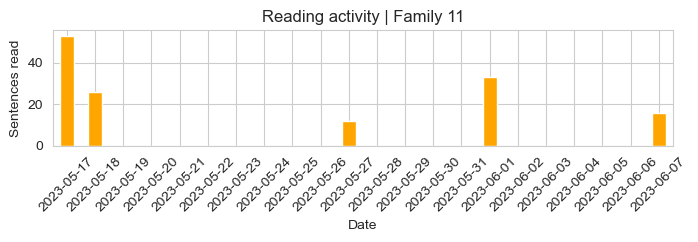

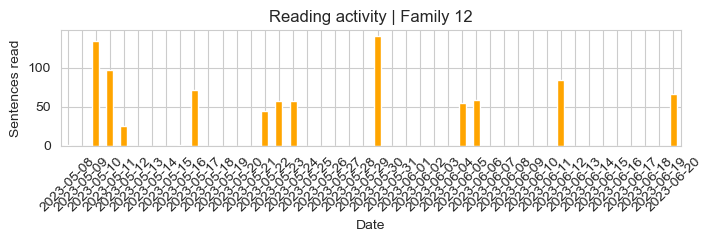

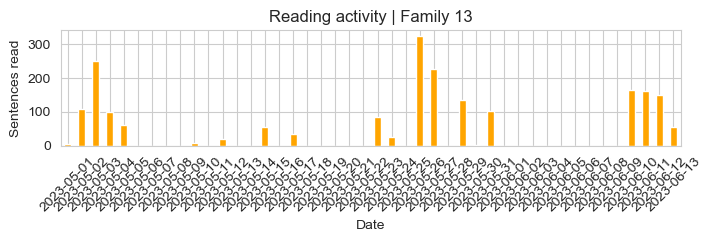

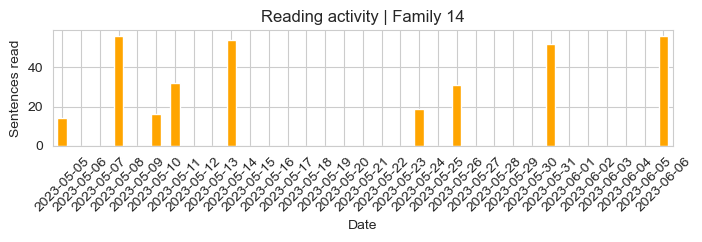

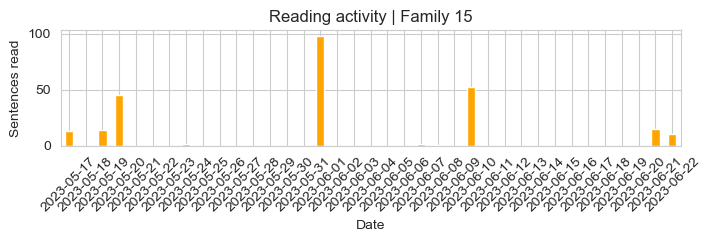

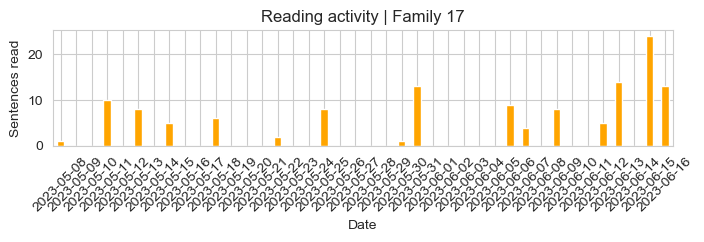

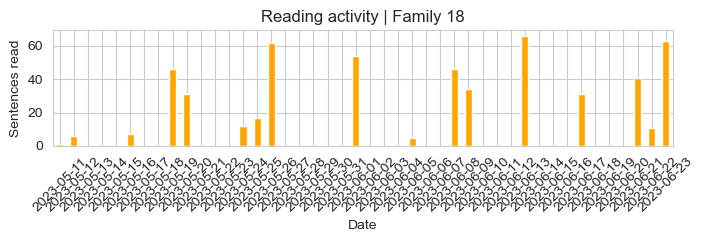

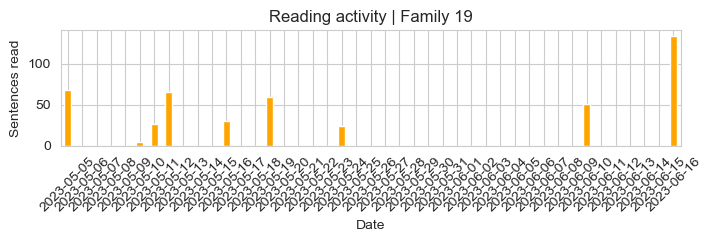

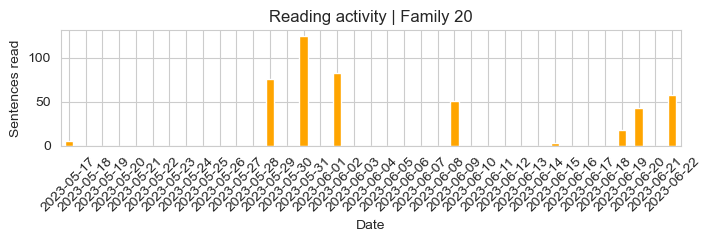

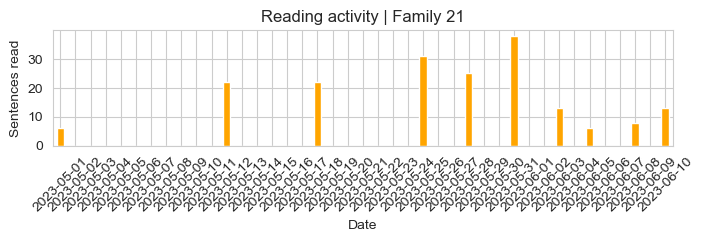

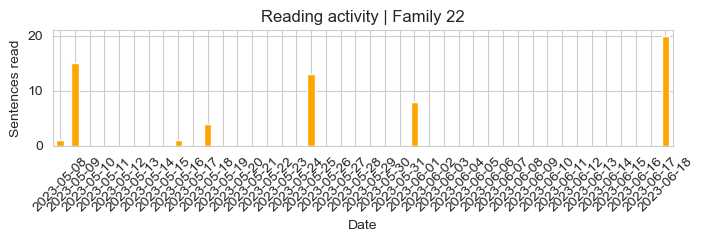

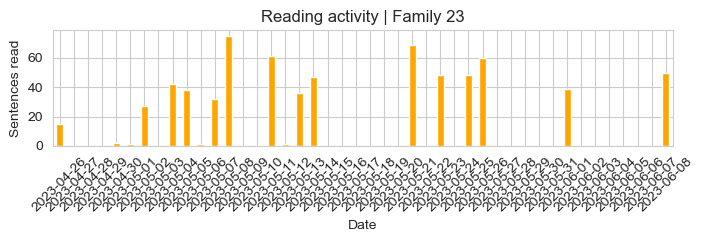

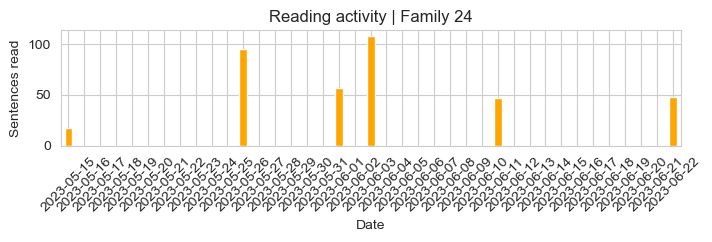

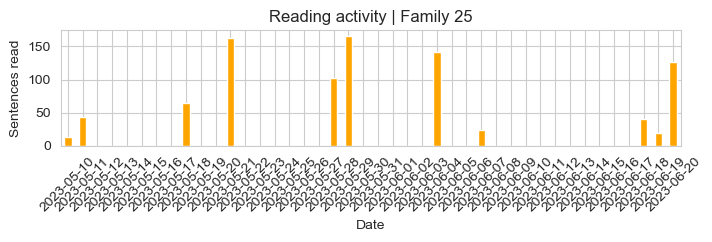

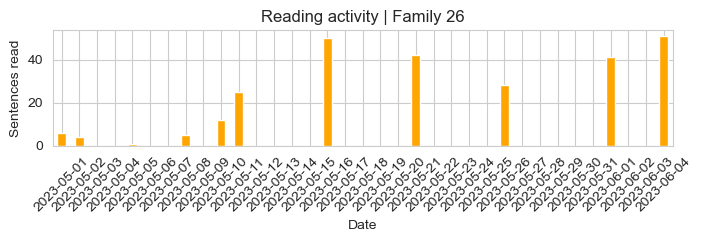

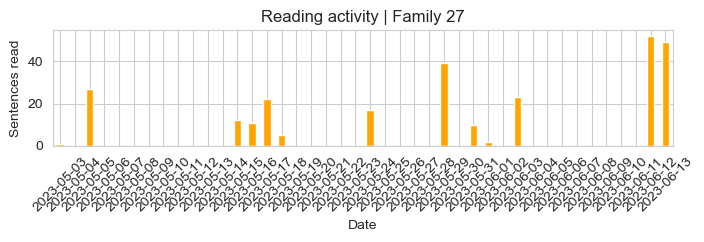

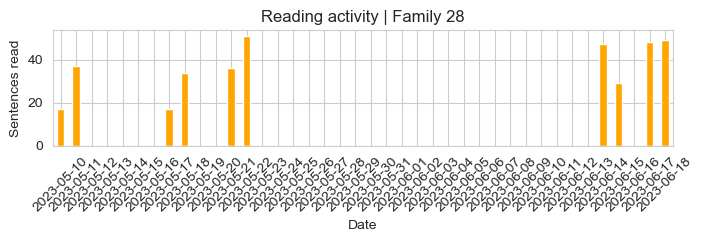

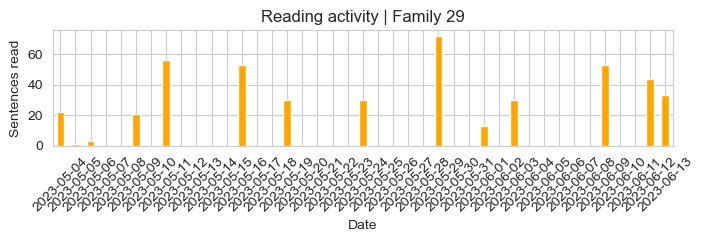

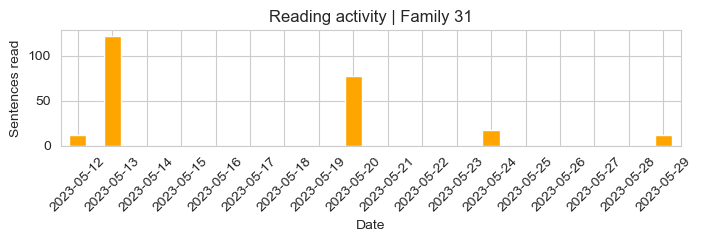

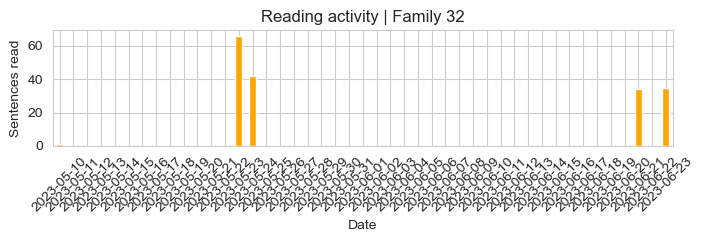

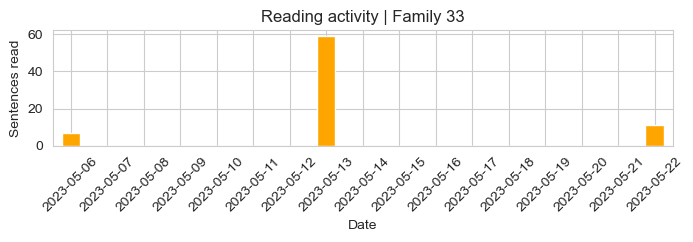

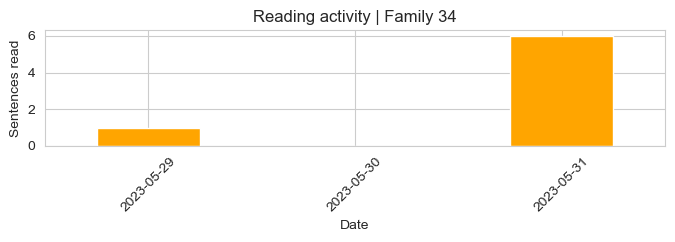

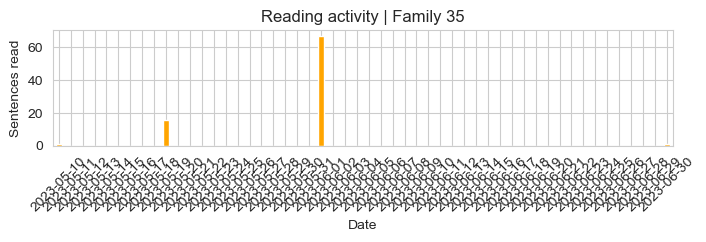

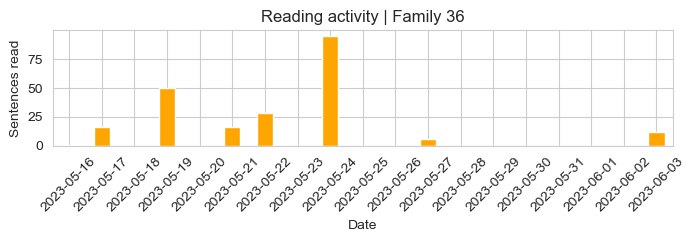

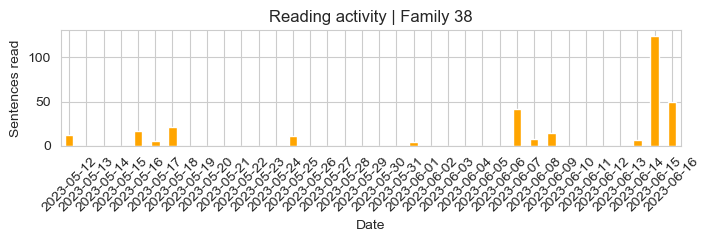

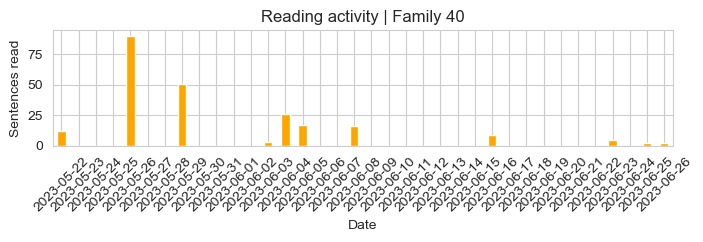

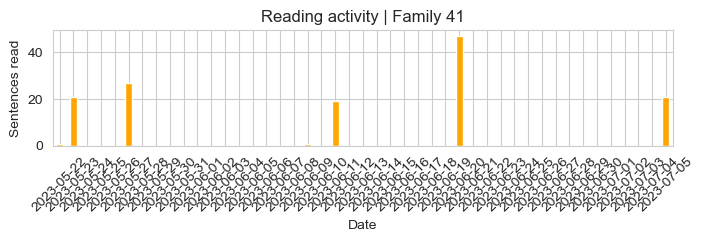

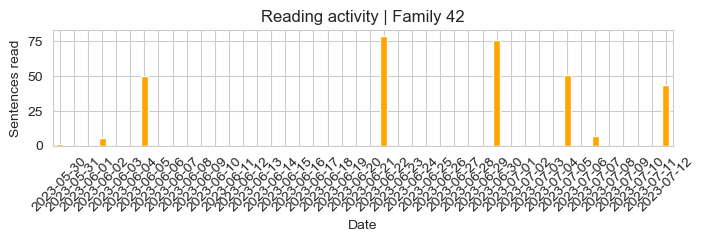

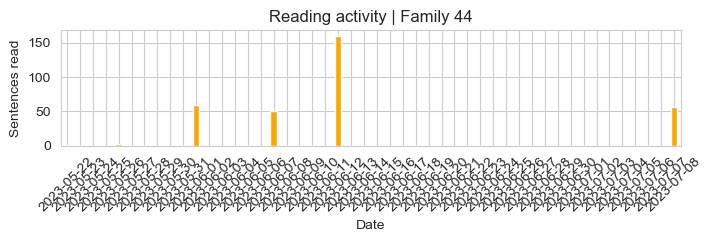

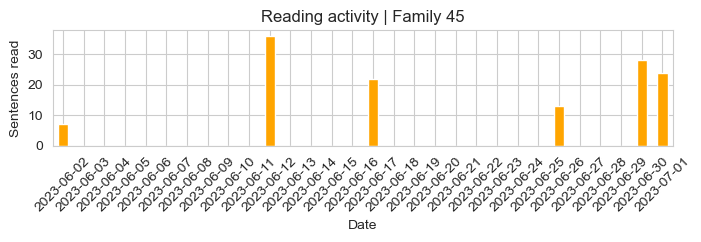

In [5]:
import matplotlib.pyplot as plt

# Convert the 'timestamp' column to datetime
df_act_logs_sentences['timestamp'] = pd.to_datetime(df_act_logs_sentences['datetime'],format='ISO8601')

# Extract date from timestamp and create a new 'date' column
df_act_logs_sentences['date'] = df_act_logs_sentences['timestamp'].dt.date

for i in range (1,46):
    if (i not in [16,30,37,39,43]):
        if(i>=10):
            family = "Family_"+str(i)
        else:
            family = 'Family_0'+str(i)
        # Group by date and sum the activity
        daily_activity = df_act_logs_sentences[(df_act_logs_sentences.user==family) & (df_act_logs_sentences.actionName=='loadSentence')].groupby('date')['user'].count()
        #
        # # Create a date range that covers the entire period of interest
        date_range = pd.date_range(start=daily_activity.index.min(), end=daily_activity.index.max(), freq='D')

        # Reindex the series to include all dates, filling missing values with 0
        daily_activity = daily_activity.reindex(date_range, fill_value=0)

        # Plot the bar chart
        ax = daily_activity.plot(kind='bar', figsize=(8, 1.5), color='orange')
        ax.set_title('Reading activity | Family '+str(i))
        ax.set_xlabel('Date')
        ax.set_ylabel('Sentences read')
        ax.set_xticks(range(len(daily_activity)))
        ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in daily_activity.index], rotation=45)
        plt.show()

In [6]:
df_sentences_per_day = df_act_logs_sentences[(df_act_logs_sentences.actionName=='loadSentence')].groupby(['user','date'])['date'].count()
df_sentences_per_day=df_sentences_per_day.reset_index(name='sentencesRead')
df_sentences_per_day_summary = df_sentences_per_day[df_sentences_per_day['sentencesRead']>2].groupby('user')['date'].nunique().reset_index(name='daysActivity')
df_sentences_per_day_summary


,user,daysActivity
0,Family_01,23
1,Family_02,3
2,Family_03,11
3,Family_04,14
4,Family_05,19
5,Family_06,5
6,Family_07,12
7,Family_08,15
8,Family_09,10
9,Family_10,12


In [7]:
# Sort by 'user' first and then by 'timestamp'
df_sorted = df_act_logs_sentences.sort_values(by=['user', 'timestamp'], ascending=[True, True])

#print(df_sorted[210:225][['page','sentence','actionName','description','timestamp']])
print(df_sorted[210:225][['description']]['description'].str[-15:])

11369       loadSentence
11370       loadSentence
11371       loadSentence
11372       loadSentence
11373    to chapter page
11374       loadSentence
11375    las llaves->off
11376     las llaves->on
11377    del árbol?->off
11378     del árbol?->on
11379    ro ladrar.->off
11380       loadSentence
11381       loadSentence
11382       loadSentence
11383       loadSentence
Name: description, dtype: object


In [31]:
#current user
curr_user = ''
sid = 0
curr_mode = '-'
sid_read = 0
sid_q = 0

#min threshold duration
min_threshold_duration = 15
count_long_session_read = 0
count_long_session_q = 0
#
# # Iterate through the rows and assign session IDs based on 30-minute difference
for i in range(1, len(df_sorted)):
    #print(df_act_logs_sentences.at[i,'user'])
    if(curr_user==''):
         curr_user=df_sorted.at[i,'user']
         curr_mode = 'read'
    else:
         if(curr_user!=df_sorted.at[i,'user']):
             curr_user=df_sorted.at[i,'user']
             #sid=1
             curr_mode='read'
             sid_read = 1
             sid_q = 0
         else:
            #print(pd.to_datetime(df_act_logs_sentences.at[i, 'datetime']) - pd.to_datetime(df_act_logs_sentences.at[i - 1, 'datetime']))
            if (df_sorted.at[i, 'actionName']=='clickPrompt'):
                if((curr_mode=='read') | (((pd.to_datetime(df_sorted.at[i, 'datetime']) - pd.to_datetime(df_sorted.at[i - 1, 'datetime'])) > pd.Timedelta(minutes=min_threshold_duration)))):
                    if((pd.to_datetime(df_sorted.at[i, 'datetime']) - pd.to_datetime(df_sorted.at[i - 1, 'datetime'])) > pd.Timedelta(minutes=min_threshold_duration)):
                        if(curr_mode=='read'):
                            count_long_session_read  = count_long_session_read + 1
                        else:
                            if(curr_mode=='question'):
                                count_long_session_q = count_long_session_q + 1
                    sid_q = sid_q + 1
                curr_mode = 'question'
            else:
                if(df_sorted.at[i, 'actionName']=='loadSentence'):
                   if((curr_mode=='question') | (((pd.to_datetime(df_sorted.at[i, 'datetime']) - pd.to_datetime(df_sorted.at[i - 1, 'datetime'])) > pd.Timedelta(minutes=min_threshold_duration)))):
                       if((pd.to_datetime(df_sorted.at[i, 'datetime']) - pd.to_datetime(df_sorted.at[i - 1, 'datetime'])) > pd.Timedelta(minutes=min_threshold_duration)):
                           if(curr_mode=='read'):
                                count_long_session_read  = count_long_session_read + 1
                           else:
                                if(curr_mode=='question'):
                                    count_long_session_q = count_long_session_q + 1
                       sid_read = sid_read + 1
                   curr_mode='read'
    sid = 0
    if(curr_mode=='read'):
        sid=sid_read
    if(curr_mode=='question'):
        sid=sid_q
    df_sorted.loc[i,'mode'] = curr_mode+'-'+str(sid)

    if(df_sorted.at[i, 'actionName']=='endOfCurrentChapter'):
        sid_read=sid_read+1
        curr_mode='read'
    #
# print test
print(df_sorted[780:800])
print(count_long_session_read)
print(count_long_session_q)

            user                actionName  \
11939  Family_01              loadSentence   
11940  Family_01              loadSentence   
11941  Family_01              loadSentence   
11942  Family_01              loadSentence   
11943  Family_01              loadSentence   
11944  Family_01              loadSentence   
11945  Family_01               clickPrompt   
11946  Family_01               clickPrompt   
11947  Family_01               clickPrompt   
11948  Family_01  reachEndOfCurrentChapter   
11949  Family_01              loadSentence   
11950  Family_01              loadSentence   
11951  Family_01              loadSentence   
11952  Family_01              loadSentence   
11953  Family_01              loadSentence   
11954  Family_01              loadSentence   
11955  Family_01              loadSentence   
11956  Family_01              loadSentence   
11957  Family_01              loadSentence   
11958  Family_01               clickPrompt   

                                 

           user      mode                     first                      last  \
7     Family_01   read-16  2023-05-09T01:13:48.465Z  2023-05-09T01:30:06.831Z   
71    Family_02    read-4  2023-05-03T13:05:22.321Z  2023-05-03T13:37:07.412Z   
97    Family_03   read-28  2023-05-29T13:34:39.390Z  2023-05-29T19:11:32.583Z   
152   Family_04   read-42  2023-05-27T12:59:04.896Z  2023-05-27T13:17:41.589Z   
166   Family_05   read-10  2023-05-16T02:55:38.195Z  2023-05-16T03:14:31.849Z   
177   Family_05   read-20  2023-05-31T19:02:11.096Z  2023-05-31T19:19:48.498Z   
178   Family_05   read-21  2023-06-02T01:46:46.973Z  2023-06-02T02:05:28.580Z   
239   Family_07   read-26  2023-05-18T23:46:23.234Z  2023-05-19T00:08:36.873Z   
249   Family_07   read-35  2023-05-22T16:41:28.953Z  2023-05-22T17:06:51.734Z   
251   Family_07   read-37  2023-05-26T16:58:01.937Z  2023-05-26T17:17:30.455Z   
252   Family_07   read-38  2023-06-03T16:06:19.623Z  2023-06-03T16:21:44.526Z   
411   Family_09   read-55  2

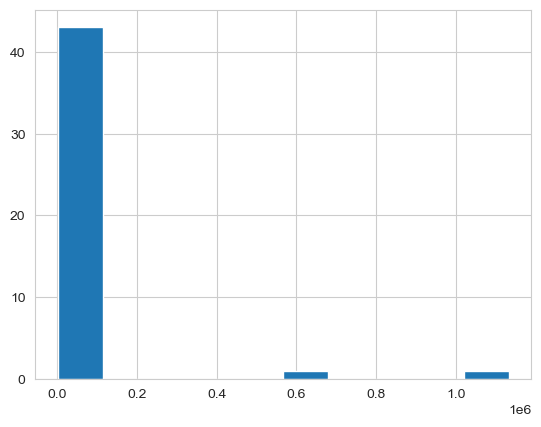

In [37]:
 #agreagation of reading time

# session duration
agg_sessions_read = df_sorted[df_sorted['mode'].str.startswith('read',na=False)].groupby(['user','mode'])['datetime'].agg(['first', 'last']).reset_index()

agg_sessions_read = agg_sessions_read.dropna()

agg_sessions_read['duration'] = pd.to_datetime(agg_sessions_read['last'],format='ISO8601')-pd.to_datetime(agg_sessions_read['first'],format='ISO8601')

# Convert timedelta to seconds
agg_sessions_read['duration_seconds'] = agg_sessions_read['duration'].dt.total_seconds()

agg_sessions_read[agg_sessions_read['duration_seconds']>900]['duration_seconds'].hist()
print(agg_sessions_read[agg_sessions_read['duration_seconds']>900])

agg_sessions_read.loc[agg_sessions_read.duration_seconds>900,'duration_seconds'] = 900

print(agg_sessions_read['duration_seconds'].describe())

# Aggregate the seconds (sum in this case)
agg_sessions_read_sum = agg_sessions_read.groupby(['user'])['duration_seconds'].sum().reset_index(name="totalTimeReadSecs")

print(agg_sessions_read[50:60][['user','mode','duration']])
print(agg_sessions_read_sum)

In [39]:
#aggregation of question time
# session duration
agg_sessions_q = df_sorted[df_sorted['mode'].str.startswith('question',na=False)].groupby(['user','mode'])['datetime'].agg(['first', 'last']).reset_index()

agg_sessions_q = agg_sessions_q.dropna()

agg_sessions_q['duration'] = pd.to_datetime(agg_sessions_q['last'],format='ISO8601')-pd.to_datetime(agg_sessions_q['first'],format='ISO8601')

# Convert timedelta to seconds
agg_sessions_q['duration_seconds'] = agg_sessions_q['duration'].dt.total_seconds()

#agg_sessions_q[agg_sessions_q['duration_seconds']>900]['duration_seconds'].hist()
#print(agg_sessions_q[agg_sessions_q['duration_seconds']>900])

agg_sessions_q.loc[agg_sessions_q.duration_seconds>900,'duration_seconds'] = 900

print(agg_sessions_q['duration_seconds'].describe())

# Aggregate the seconds (sum in this case)
agg_sessions_q_sum = agg_sessions_q.groupby(['user'])['duration_seconds'].sum().reset_index(name="totalTimeQuestionsSecs")

print(agg_sessions_q[50:60][['user','mode','duration']])
print(agg_sessions_q_sum)

count    1779.000000
mean       36.216962
std        49.839680
min         0.000000
25%         3.665500
50%        20.916000
75%        49.619500
max       521.461000
Name: duration_seconds, dtype: float64
         user         mode               duration
50  Family_01   question-7 0 days 00:00:44.065000
51  Family_01   question-8 0 days 00:00:38.737000
52  Family_01   question-9 0 days 00:00:52.819000
53  Family_02   question-1 0 days 00:01:21.255000
54  Family_02   question-2 0 days 00:00:44.742000
55  Family_02   question-3        0 days 00:00:00
56  Family_03   question-1        0 days 00:00:00
57  Family_03  question-10 0 days 00:00:55.663000
58  Family_03  question-11 0 days 00:00:19.532000
59  Family_03  question-12 0 days 00:00:55.059000
         user  totalTimeQuestionsSecs
0   Family_01                2513.784
1   Family_02                 125.997
2   Family_03                1134.501
3   Family_04                1005.563
4   Family_05                   0.000
5   Family_06  